In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import confusion_matrix

In [66]:
cdata=pd.read_csv('complaints.csv')
cdata.head()

C:\Users\vishn\AppData\Local\Temp\ipykernel_6584\3037904487.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  cdata=pd.read_csv('complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-07-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"Nelnet, Inc.",IL,61103,NaN,NaN,Web,2023-08-23,Closed with explanation,Yes,NaN,7284490
1,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",FL,33444,NaN,NaN,Web,2023-08-25,Closed with non-monetary relief,Yes,NaN,7588176
2,2023-08-24,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,Experian Information Solutions Inc.,NJ,07024,NaN,Other,Web,2023-08-24,In progress,Yes,NaN,7452639
3,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"SANTANDER HOLDINGS USA, INC.",FL,33972,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7512160
4,2023-08-23,"Credit reporting, credit repair services, or o...",Other personal consumer report,Incorrect information on your report,Information that should be on the report is mi...,NaN,NaN,LEXISNEXIS,FL,32258,NaN,Other,Web,2023-08-23,In progress,Yes,NaN,7442688


In [67]:
cdata.shape

(4101381, 18)

In [68]:
cdata['Product'].nunique()

21

In [69]:
cd=cdata[['Consumer complaint narrative','Product']]
print('Shape of data',cdata.shape)

Shape of data (4101381, 18)


In [70]:
cd.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports':'Credit reporting, repair, or other', 
              'Credit reporting':'Credit reporting, repair, or other',
              'Credit reporting or other personal consumer reports':'Credit reporting, repair, or other',
             'Payday loan': 'Payday loan, title loan, or personal loan',
              'Credit card': 'Credit card or prepaid card',
              'Prepaid card':'Credit card or prepaid card',
              'Payday loan, title loan, personal loan, or advance loan':'Payday loan, title loan, or personal loan',
             'Money transfers': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)



cd = cd[(cd['Product'] == 'Credit reporting, repair, or other') | \
                             (cd['Product'] == 'Debt collection') | \
                             (cd['Product'] == 'Mortgage') | \
                             (cd['Product'] == 'Consumer Loan')
                            ]

unique_values = ['Credit reporting, repair, or other','Debt collection','Consumer Loan','Mortgage']
#data['Product'].unique() 
unique_df = pd.DataFrame({'u': unique_values})
print(unique_df)

C:\Users\vishn\AppData\Local\Temp\ipykernel_6584\3974759201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd.replace({'Product':


                                    u
0  Credit reporting, repair, or other
1                     Debt collection
2                       Consumer Loan
3                            Mortgage


In [71]:
print('Before dropping the nulls')
display('Null count', cd.isna().sum())
print('Total rows of data', len(cd))
cd.dropna(inplace=True)
print( )
print('After dropping the nulls')
display('Null count', cd.isna().sum())
print('Total rows of data', len(cd))

Before dropping the nulls


'Null count'

Consumer complaint narrative    2150867
Product                               0
dtype: int64

Total rows of data 3302890

After dropping the nulls


'Null count'

Consumer complaint narrative    0
Product                         0
dtype: int64

Total rows of data 1152023


In [72]:
# cd=cd.head(1500).reset_index(drop=True)
cd=cd.sample(1500,random_state=1).copy()
display(cd.head())
display(cd.tail())

,Consumer complaint narrative,Product
792511,Florida XXXX XXXX imposes nonrecurring taxes o...,Debt collection
1462903,"capital one is reporting to XXXX, XXXX, and XX...","Credit reporting, repair, or other"
1456398,The creditor is checking my credit reports wit...,Consumer Loan
3738583,This is my NUMEROUS request that I have been a...,"Credit reporting, repair, or other"
2923345,i send the letter on XX/XX/2019 to experian ab...,"Credit reporting, repair, or other"


,Consumer complaint narrative,Product
1837610,These are not my accounts on my Transunion cre...,"Credit reporting, repair, or other"
621247,On XX/XX/XXXX and XX/XX/XXXX my brother 's ex-...,Debt collection
3293808,I recently reviewed a copy of my credit report...,"Credit reporting, repair, or other"
1011631,I have contacted Experian and have not had thi...,"Credit reporting, repair, or other"
3040837,Bank of America granted a home equity loan on ...,Mortgage


In [73]:
cd.shape

(1500, 2)

In [74]:
cd['Product'].unique()

array(['Debt collection', 'Credit reporting, repair, or other',
       'Consumer Loan', 'Mortgage'], dtype=object)

In [75]:
cd['Product'].value_counts()

Credit reporting, repair, or other    1045
Debt collection                        291
Mortgage                               149
Consumer Loan                           15
Name: Product, dtype: int64

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
                                            cd['Consumer complaint narrative'], cd['Product'],
                                            test_size=0.25, random_state=0, stratify=cd['Product'])
print(f'Training data: {len(X_train)}')
print(f'Testing data: {len(X_test)}')


Training data: 1125
Testing data: 375


In [77]:
display(y_train.value_counts())

Credit reporting, repair, or other    784
Debt collection                       218
Mortgage                              112
Consumer Loan                          11
Name: Product, dtype: int64

In [78]:
display(X_train.value_counts())

My name is XXXX XXXX this complaint is not made in error neither is it being made by a third party.I declare under penalty of perjury I am alleging that a person or company- without my authorization- from unauthorized use of my social security number and card used my personal identifying information to apply for goods, services, or money ; and, was successful in creating some accounts. I have no knowledge of this and All is being investigated by the FTC and Under 15 U.S. Code 1681b Permissible purposes of consumer reports i never gave any written consent to report anything on my consumer reports no consent is fraud.                                                                                                                                                                                                                                                                                                                                                                                         

In [79]:
display(y_test.value_counts())

Credit reporting, repair, or other    261
Debt collection                        73
Mortgage                               37
Consumer Loan                           4
Name: Product, dtype: int64

In [80]:
display(X_test.value_counts())

I'm really not sure what happened. I have mailed off letters to the credit bureaus continuously and thus far I have not gotten a response. My name is XXXX XXXX and I am filing this complaint for falsely reporting misleading information. There is no third party involved. Please review the uploaded letters.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [81]:
vectorizer = TfidfVectorizer(stop_words= 'english')
# convert the documents into a matrix
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)
X_train_vec, X_test_vec

(<1125x6217 sparse matrix of type '<class 'numpy.float64'>'
 	with 52245 stored elements in Compressed Sparse Row format>,
 <375x6217 sparse matrix of type '<class 'numpy.float64'>'
 	with 16603 stored elements in Compressed Sparse Row format>)

In [82]:
from sklearn.feature_selection import SelectKBest, chi2

n_features=100

ch = SelectKBest(chi2, k=n_features)
X_train_sp = ch.fit_transform(X_train_vec, y_train)
X_test_sp  = ch.transform(X_test_vec)

X_train_sp, X_test_sp

# Converting the sparse matrix to a dense one to visualize it.

cols = list(range(n_features))

X_train_dense = pd.DataFrame(data=X_train_sp.toarray(), columns=cols)
X_test_dense  = pd.DataFrame(data=X_test_sp.toarray(), columns=cols)
print(X_train_dense.shape, X_test_dense.shape)
X_train_dense

(1125, 100) (375, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.076782,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.164227,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.055209,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.024355,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1121,0.285639,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1122,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1123,0.021553,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
# Now we have train and test data as vectors
# Let us also convert the target data appropriately


encoder = LabelEncoder()
y_train2  = encoder.fit_transform(y_train)
y_test2   = encoder.transform(y_test)
y_train2.min(), y_train2.max(), y_test2.min(), y_test2.max() # sanity check
mapping = {l: i for i, l in enumerate(encoder.classes_)}
mapping

{'Consumer Loan': 0,
 'Credit reporting, repair, or other': 1,
 'Debt collection': 2,
 'Mortgage': 3}

In [84]:
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np

# Create an XGBoost classifier with the desired parameters
xgb_model = xgb.XGBClassifier(n_estimators=200, random_state=42, n_jobs=-1)

# Perform cross-validation with XGBoost
scores = cross_val_score(xgb_model, X_train_dense, y_train2, cv=5, n_jobs=-1, scoring='accuracy')

# Calculate the mean accuracy
mean_accuracy = np.mean(scores)

# Print the mean accuracy
print("Mean Accuracy:", mean_accuracy)


Mean Accuracy: 0.847111111111111


In [85]:
from sklearn.metrics import accuracy_score
xgb_model.fit(X_train_dense, y_train2)

# Make predictions on the test set
pred = xgb_model.predict(X_test_dense)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test2, pred)

# Print the accuracy on the test set
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.832


In [86]:
pred[0]

2

In [87]:
pred=encoder.inverse_transform(pred)
pred[0]

'Debt collection'

In [88]:
rf_model  = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs = -1)
scores1 = cross_val_score(rf_model,
                         X_train_dense,
                         y_train2,
                         cv=5,
                         n_jobs = -1,
                         scoring = 'accuracy')
scores1.mean()
# Calculate the mean accuracy
mean_accuracy2 = np.mean(scores1)

# Print the mean accuracy
print("Mean Accuracy:", mean_accuracy2)

Mean Accuracy: 0.8480000000000001


In [89]:
rf_model.fit(X_train_dense, y_train2)
pred1=rf_model.predict(X_test_dense)
accuracy2 = accuracy_score(y_test2, pred1)
print("Accuracy on test set:", accuracy2)

Accuracy on test set: 0.8453333333333334


In [90]:
pred1[0]

2

In [91]:
pred1=encoder.inverse_transform(pred1)
pred1[0]

'Debt collection'

In [92]:
new_data = pd.DataFrame(columns=['Complaint','Actual Product','Prediction'])
new_data['Complaint']      = X_test
new_data['Actual Product'] = y_test
new_data['Prediction']     = pred
new_data['Correct'] = (new_data['Actual Product'] == new_data['Prediction']).astype('int')
display(new_data)
print(f'Accuracy: {100*new_data.Correct.sum()/new_data.Correct.count()} %')

,Complaint,Actual Product,Prediction,Correct
662362,I reviewed my recent credit report and upon ch...,Debt collection,Debt collection,1
2849369,"When I reviewed my credit report, I discovered...","Credit reporting, repair, or other","Credit reporting, repair, or other",1
394395,On ( XX/XX/2022 ) I sent a letter regarding in...,"Credit reporting, repair, or other","Credit reporting, repair, or other",1
712801,"Upon reviewing of my records, I am upset on wh...","Credit reporting, repair, or other","Credit reporting, repair, or other",1
3428451,It appears that my credit file has been compro...,"Credit reporting, repair, or other","Credit reporting, repair, or other",1
...,...,...,...,...
579590,Security Credit Service Orginal creditor : XXX...,Debt collection,Debt collection,1
3790017,"To Whom this may concern, I am not responsible...","Credit reporting, repair, or other","Credit reporting, repair, or other",1
2116501,I have disputed this same issue in XX/XX/2022....,Debt collection,Debt collection,1
695564,"Some info is displayed more than once, same ac...","Credit reporting, repair, or other","Credit reporting, repair, or other",1


Accuracy: 83.2 %


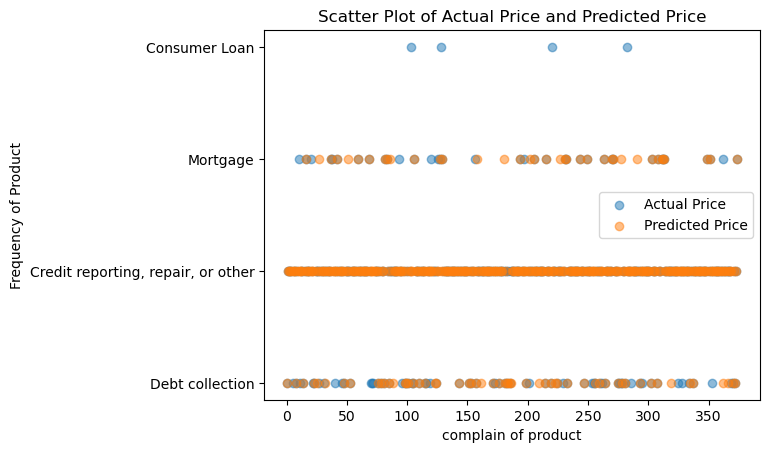

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot for 'Actual Price'
plt.scatter(range(len(y_test)), y_test, label='Actual Price', alpha=0.5)

# Create a scatter plot for 'Predicted Price'
plt.scatter(range(len(pred)), pred, label='Predicted Price', alpha=0.5)

plt.xlabel('complain of product')
plt.ylabel('Frequency of Product')
plt.title('Scatter Plot of Actual Price and Predicted Price')
plt.legend()
plt.show()

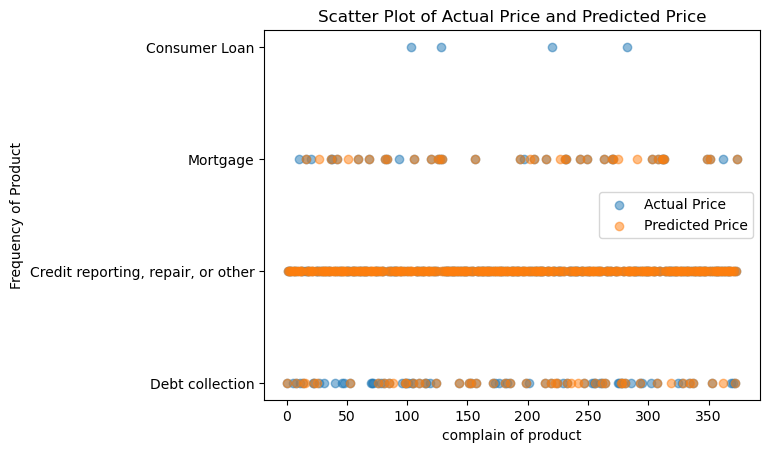

In [94]:
plt.scatter(range(len(y_test)), y_test, label='Actual Price', alpha=0.5)

# Create a scatter plot for 'Predicted Price'
plt.scatter(range(len(pred)), pred1, label='Predicted Price', alpha=0.5)

plt.xlabel('complain of product')
plt.ylabel('Frequency of Product')
plt.title('Scatter Plot of Actual Price and Predicted Price')
plt.legend()
plt.show()

In [95]:
# so we can tell from above XGBoost is performing batter

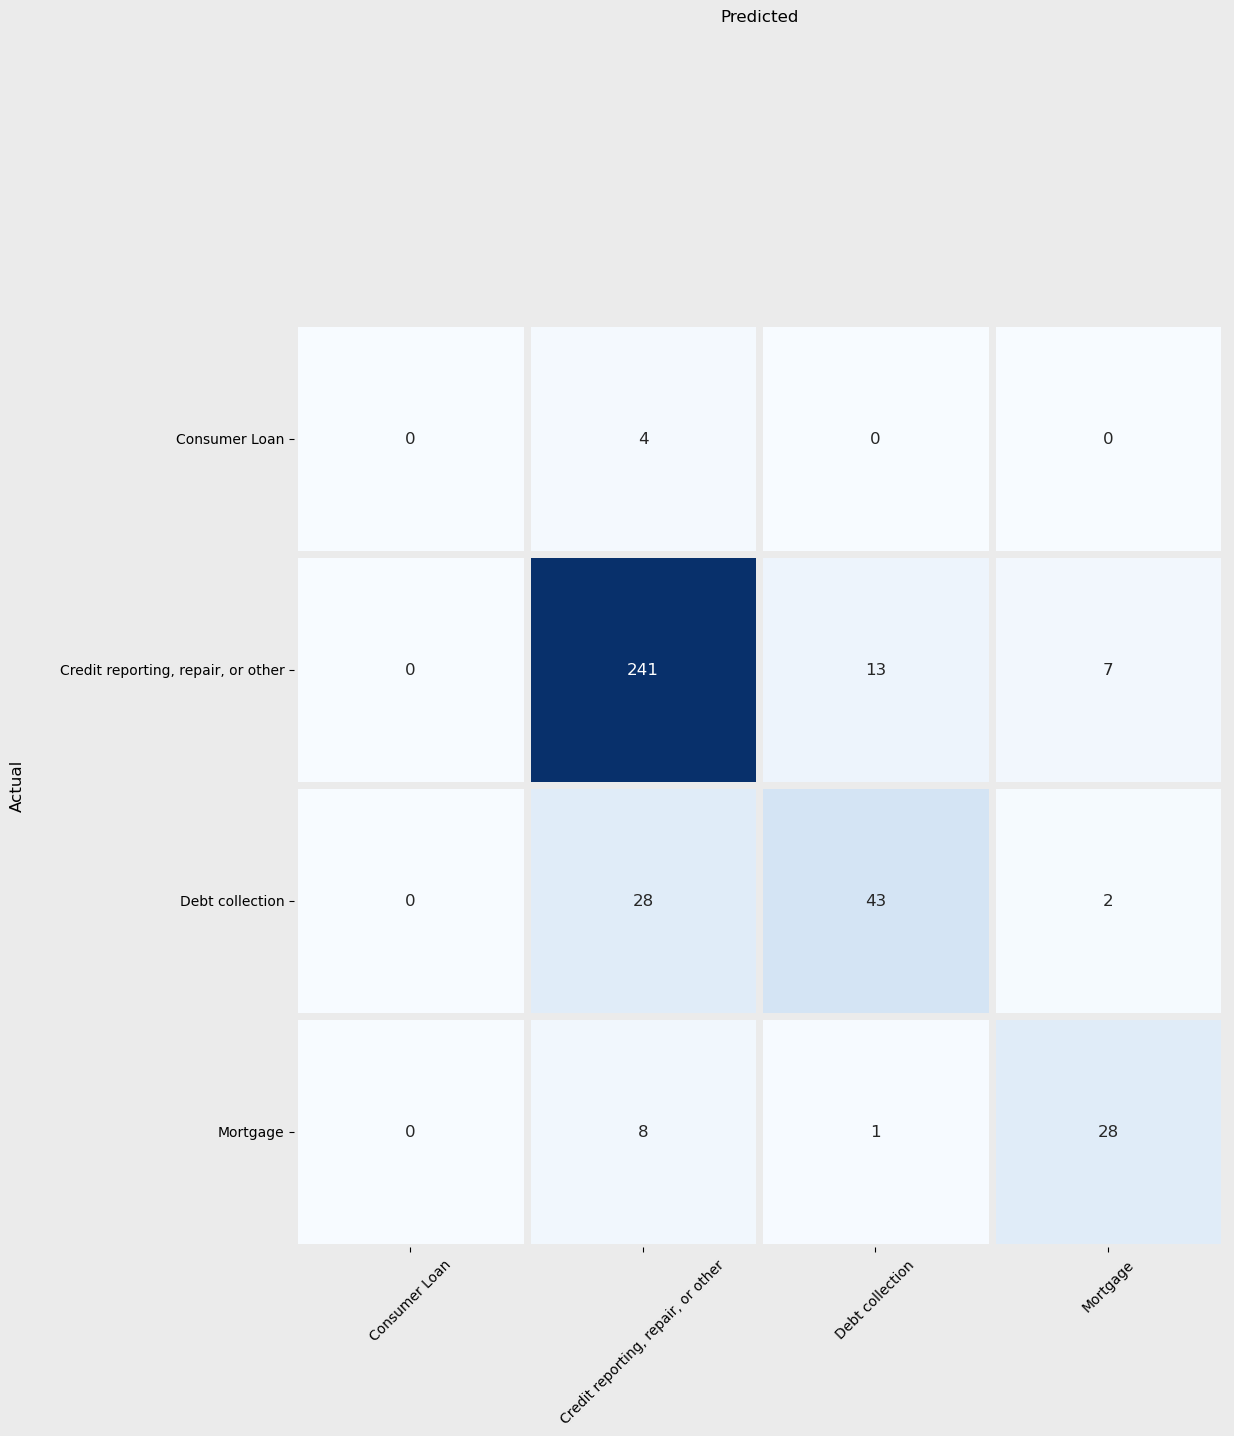

In [96]:
cm = confusion_matrix(y_test, pred, labels=encoder.classes_)

# Create a function to plot the confusion matrix
def plot_confusion_matrix(cm, labels, size=35, rotate_labels=False):
    font_specs = {'fontsize': size}
    fig, ax = plt.subplots(figsize=(size, size), facecolor='#ebebeb', frameon=True, edgecolor='black')
    ax = sns.heatmap(cm, annot=True, cbar=False, cmap='Blues', linewidths=5,
                     linecolor='#ebebeb', annot_kws=font_specs, fmt='g')
    if rotate_labels:
        plt.xticks(np.arange(len(labels)) + 0.5, labels, rotation=45)
        plt.yticks(np.arange(len(labels)) + 0.5, labels, rotation=0)
    else:
        plt.xticks(fontsize=size)
        plt.yticks(fontsize=size)
    plt.xlabel('Predicted', fontdict=font_specs, labelpad=-(size * 85))
    plt.ylabel('Actual', fontdict=font_specs, labelpad=25)

# Plot the confusion matrix using the 'viridis' colormap
plot_confusion_matrix(cm=cm, labels=encoder.classes_, size=12, rotate_labels=True)

plt.show()